# LOADED BEAM

### INTRODUCTION TO THE PROBLEM

Today's case represents a beam attached to the wall at one side, free to move on the other. It was asked us to find the analytical model and the representation of a particulary case: the inflection and deformation when subjected with a distributed load. As our riferiment system we decided to set the point at the wall as the origin and the other end as 1, considering a general case of  a board of unitary length.
For the ordinary axis, we oriented it to the groud and vertically-oriented
 To semplify che discussion, we will consider a one-dimensional bar as the representation of an entire board, considering just its projection  to the xy plane. As consequence, every misure is function of the x, indeed the distance from the wall.
 
As initial condition we consider

1- the displacement equals 0 at the wall (u(x=0)=0)

2- the derivative of the displacement equals 0 at the wall(du(x=0)/dx=0)

### PRELIMINARY CONSIDERATION

First of all, we decided to find the link between 2nd derivative of displacement and position. This lead us to the known formula d^2u / dx^2 = - M(x) / EJ, where E is the Joung Modulus, J is the moment of inertia of the section and M is the momentum. 

## 1. REFERENCE CASE

The first case we analized was the one where M(x) is constant and particularly M/EJ equals -1. This case represents a simplified view of the problem, allowing us to simplify the subsequent equation. 
However, this model is not the most accurate representation of reality. 

We start with a double integration, resulting in the following formula 

    u(x) = -1/2 x^2 + C1 x + C2. 

In order to find the two constants we apply the following boundary conditions: 

    u(x=0) = 0 and u'(x=0) = 0. 

The result is 

    u(x) = -1/2 x^2. 

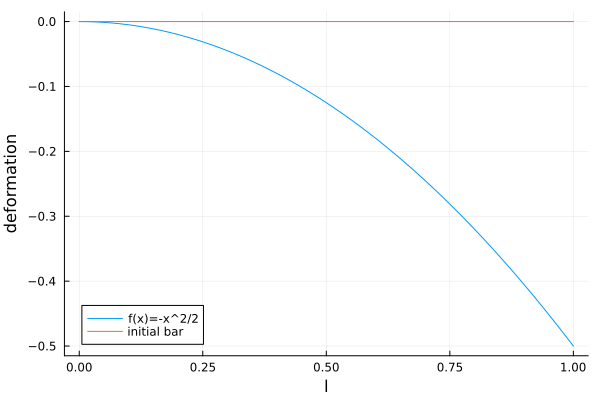

In [3]:
using Plots

function f(x)
    -x^2/2
end
g(x) = 0*x;

x_values=range(0,1,50)

y_values=f.(x_values)

plot!(x_values,y_values,label="f(x)=-x^2/2",xlabel="l",ylabel="deformation")
plot!(x_values,g(x_values),label="initial bar")

### 1.1 LINEAR DISTRIBUTION OF MOMENTUM

The second case we considerd was  M(x)=F(l-x), so it's a linear distribution along the board. 

After a double integration, we led to the  formula 

    u(x) = -1/6 x^3 + C1*1/2 x^2 + C2x


In order to find the two constants we apply the following boundary conditions:

    u(x=0) = 0 and u'(x=0) = 0. 

The result is

    u(x) = 1/2 x^2-1/6 x^3. h

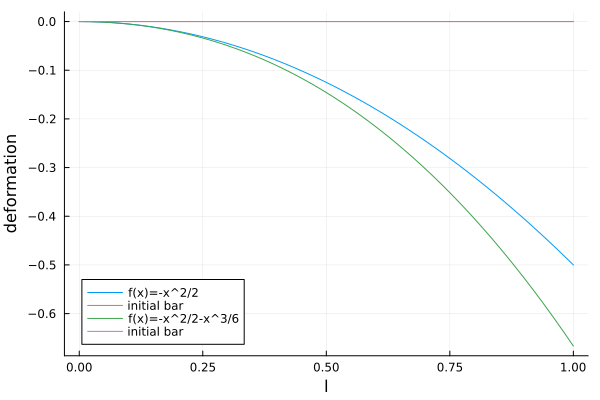

In [4]:
using Plots

f(x) = -x^2/2-x^3/6

x_values= range(0,1,50)

y_values=f.(x_values)

plot!(x_values,y_values,label="f(x)=-x^2/2-x^3/6",xlabel="l",ylabel="deformation")
plot!(x_values,g(x_values),label="initial bar")


## 2. BI-HARMONIC FORMULATION

The bi-harmonic equation consit in the following formulation:

    d^4u/dx^4=q(x)/(EJ)
 
where q(x) is the distribution of loads along the bar. To make it easier, we are going to substitute q(x)/EJ=g(x) ad consider g(x)=constant=1 (this means q=EJ).

After four integration, we reach the formula:

    u(x)=


bi-harmonic Eq: solve-bvp Differential Equation.jl; or pen and paper